### Load Data

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [18]:
train = datasets.MNIST('datasets/MNIST', train=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('datasets/MNIST', train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainSet = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testSet = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

#### Import modules to build Neural Network


In [19]:
import torch.nn as nn
import torch.nn.functional as F

### build NN

In [20]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # nn.linear - fully linear layer, arguments are (inputSize, outputSize)
        self.fullyConnectedLayer1 = nn.Linear(in_features = 28*28, out_features = 128) 
        self.fullyConnectedLayer2 = nn.Linear(128, 64)
        self.fullyConnectedLayer3 = nn.Linear(64, 32)
        self.fullyConnectedLayer4 = nn.Linear(32, 10)
    
    # forward propagation
    def forward(self, x):
        x = F.relu(self.fullyConnectedLayer1(x))
        x = F.relu(self.fullyConnectedLayer2(x))
        x = F.relu(self.fullyConnectedLayer3(x))
        
        # output layer
        x = self.fullyConnectedLayer4(x)
        x = F.log_softmax(x, dim=1) 
        
        return x

In [21]:
net = Net()
print(net)

Net(
  (fullyConnectedLayer1): Linear(in_features=784, out_features=128, bias=True)
  (fullyConnectedLayer2): Linear(in_features=128, out_features=64, bias=True)
  (fullyConnectedLayer3): Linear(in_features=64, out_features=32, bias=True)
  (fullyConnectedLayer4): Linear(in_features=32, out_features=10, bias=True)
)


### training Neural Net

#### Import modules for optimiser

In [22]:
import torch.optim as optim

In [27]:
optimizer = optim.Adam(net.parameters(), lr=1e-3)
epochs = 2

for epoch in range(epochs):
    for data in trainSet:
        # data = batch
        X, y = data[0], data[1]
        
        # Pytorch accumulates gradients for every backward pass. We manually reset it every epoch
        net.zero_grad()
        
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        
        # backpropagate
        loss.backward()
        
        # Update parameters
        optimizer.step()
    print(loss)

tensor(0.3767, grad_fn=<NllLossBackward>)
tensor(0.0007, grad_fn=<NllLossBackward>)


### Test

In [30]:
accurateClassification = 0
total = 0

# Do not calculate gradients
with torch.no_grad():
    for data in testSet:
        X,y = data
        output = net(X.view(-1,28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                accurateClassification += 1
            total += 1
print("Accuracy: {}".format(round(accurateClassification/total,2)))

Accuracy: 0.972


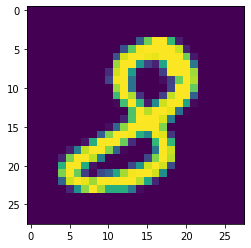

Prediction:  tensor(8)


In [34]:
plt.imshow(X[0].view(28,28))
plt.show()
print("Prediction: ", y[0])